<a href="https://colab.research.google.com/github/DrewFinley/IMSE-541-HW/blob/main/HW4_13_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [118]:
data = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Problem%2013.4.csv', sep=',', na_values=".")

data

,A,B,C,I
0,-1,-1,-1,221
1,1,-1,-1,325
2,-1,1,-1,354
3,1,1,-1,552
4,-1,-1,1,440
5,1,-1,1,406
6,-1,1,1,605
7,1,1,1,392
8,-1,-1,-1,311
9,1,-1,-1,435


In [119]:
df=data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       16 non-null     int64
 1   B       16 non-null     int64
 2   C       16 non-null     int64
 3   I       16 non-null     int64
dtypes: int64(4)
memory usage: 640.0 bytes


In [120]:
X=df[['A', 'B', 'C']]
X

,A,B,C
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1
8,-1,-1,-1
9,1,-1,-1


In [121]:
xx=X.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['Interaction', 'A', 'B', 'C', 'AB', 'AC','BC', "ABC"]) #if interaction_only=False, then 1, x1, x2, x1^2, x1x2, x2^2
xxpd

,Interaction,A,B,C,AB,AC,BC,ABC
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [122]:
X=xxpd[['A', 'B', 'C', 'AB', 'AC','BC','ABC']]
X

,A,B,C,AB,AC,BC,ABC
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [123]:
Y=df[['I']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[266. ],
       [380. ],
       [351. ],
       [512. ],
       [446.5],
       [391.5],
       [552.5],
       [405.5],
       [266. ],
       [380. ],
       [351. ],
       [512. ],
       [446.5],
       [391.5],
       [552.5],
       [405.5]])

In [124]:
Yobs=Y.to_numpy()
eij= Yobs - regr.predict(X)
eij

array([[-45. ],
       [-55. ],
       [  3. ],
       [ 40. ],
       [ -6.5],
       [ 14.5],
       [ 52.5],
       [-13.5],
       [ 45. ],
       [ 55. ],
       [ -3. ],
       [-40. ],
       [  6.5],
       [-14.5],
       [-52.5],
       [ 13.5]])

In [125]:
regr.coef_


array([[  9.125,  42.125,  35.875,  -5.625, -59.625, -12.125, -17.375]])

In [126]:
regr.intercept_

array([413.125])

In [127]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,A,B,C,AB,AC,BC,ABC
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [128]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Sun, 02 Oct 2022   Prob (F-statistic):            0.00790
Time:                        17:33:23   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.1250     12.406     33.301      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


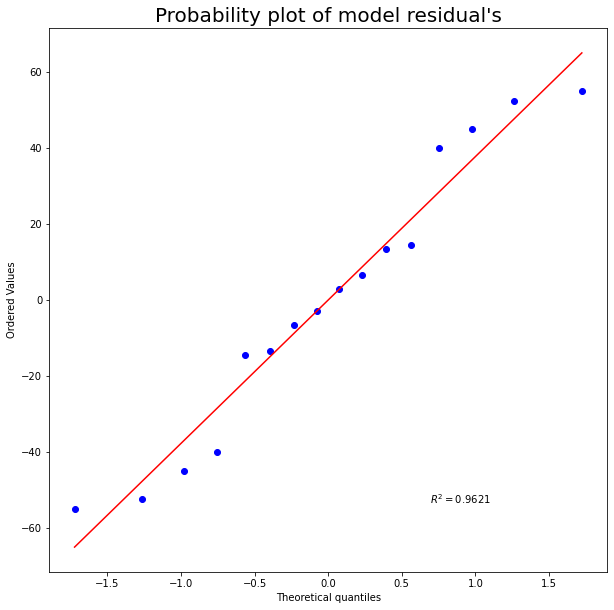

In [129]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [130]:
stats.levene(df['I'][df['A'] == -1],
             df['I'][df['A'] == 1])
# reject H0 if p value small


LeveneResult(statistic=2.9911667871195697, pvalue=0.10569523307659201)

In [131]:
stats.levene(df['I'][df['B'] == -1],
             df['I'][df['B'] == 1])

LeveneResult(statistic=0.3721709444936149, pvalue=0.5515977352989001)

In [132]:
stats.levene(df['I'][df['C'] == -1],
             df['I'][df['C'] == 1])

LeveneResult(statistic=0.6509474436896675, pvalue=0.43326735432278096)

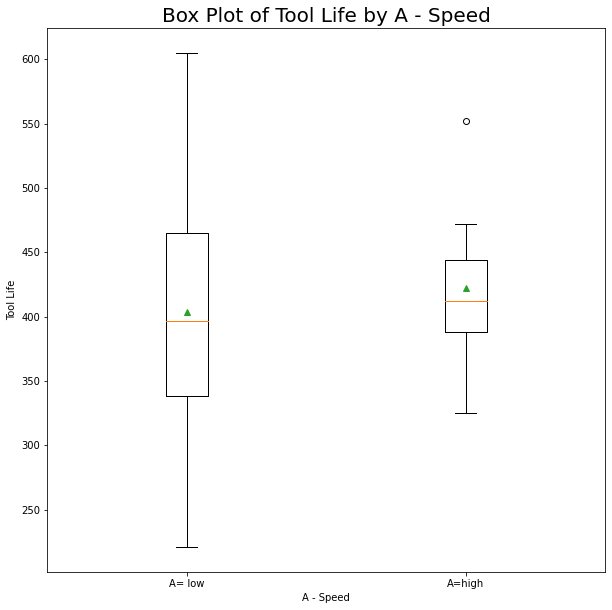

In [133]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool Life by A - Speed", fontsize= 20)
ax.set

data2 = [df['I'][df['A'] == -1],
             df['I'][df['A'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Speed")
plt.ylabel("Tool Life")

plt.show()

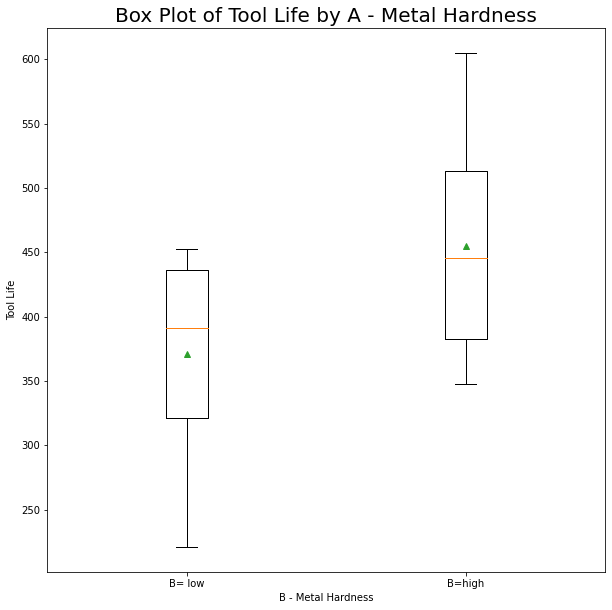

In [134]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool Life by A - Metal Hardness", fontsize= 20)
ax.set

data2 = [df['I'][df['B'] == -1],
             df['I'][df['B'] == 1]]


ax.boxplot(data2,
           labels= ['B= low', 'B=high'],
           showmeans= True)

plt.xlabel("B - Metal Hardness")
plt.ylabel("Tool Life")

plt.show()

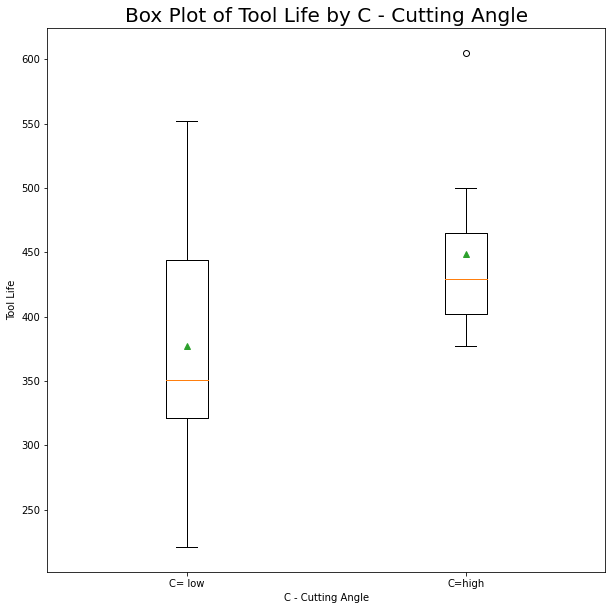

In [135]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool Life by C - Cutting Angle", fontsize= 20)
ax.set

data2 = [df['I'][df['C'] == -1],
             df['I'][df['C'] == 1]]


ax.boxplot(data2,
           labels= ['C= low', 'C=high'],
           showmeans= True)

plt.xlabel("C - Cutting Angle")
plt.ylabel("Tool Life")

plt.show()